In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import opendp
import math

# Enable opendp features
opendp is still on development mode so to use all the code you must fist.

In [2]:
from opendp.mod import enable_features
enable_features('contrib')

# OpenDP - Key Points

You don’t need to know all the details of the Programming Framework to write OpenDP applications, but it helps understand some of the key points:

   * OpenDP calculations are built by assembling a measurement from a number of constituent transformations and measurements, typically through chaining or composition.
    
    
   * Measurements don’t have a static privacy loss specified when constructing the measurement. Instead, measurements are typically constructed by specifying the scale of noise, and the loss is bounded by the resulting privacy relation. This requires some extra work compared to specifying the loss directly, but OpenDP provides some utilities to make this easier on the programmer, and the benefit is greatly increased flexibility of the framework as a whole.

# Laplace Mechanism example

### Discrete Laplace Mechanism

In [3]:
from opendp.meas import make_base_discrete_laplace
from opendp.mod import binary_search
from opendp.typing import AllDomain

epsilon = 1.0 
sensitivity = 10
l = sensitivity / epsilon
print(f"Laplcacian scale λ : {l}")

Laplcacian scale λ : 10.0


###### call the constructor to build laplacian mechanism with specific λ

In [4]:
# call the constructor to produce a measurement
discrete_laplace_mechanism = make_base_discrete_laplace(scale=l, D=AllDomain[int])

###### opendp is very helpfull in order to be use about the eligibility of your algorithm

###### for example we can check if our algorithm is differential private with respect to sensitivity (d_in) and  epsilon (d_out)

In [5]:
# investigate the privacy relation
is_private = discrete_laplace_mechanism.check(d_in=sensitivity, d_out=epsilon)
print(is_private)

True


In [6]:
l_tmp = l - 1

# call the constructor to produce a measurement
non_private_discrete_laplace_mechanism = make_base_discrete_laplace(scale=l_tmp)

# investigate the privacy relation
is_private = non_private_discrete_laplace_mechanism.check(d_in=sensitivity, d_out=epsilon)
print(is_private)

False


######  you can get the epsilon using different sensitivities

In [7]:
# you can get espilon of your laplcasian mechanism if you specify the sensitiviy
get_epsilon = discrete_laplace_mechanism.map(d_in=sensitivity)
print(get_epsilon)

1.0


###### An other very usefull think that you can do is to find a parameter in order to be private.

In [8]:
# return the first value that satisfies the condition
binary_search(lambda x : x >= 10)

10.0

In [9]:
# return the first value that satisfies the condition
binary_search(lambda x : x > 10)

10.000000000000002

In [10]:
# you can also spesify the type
binary_search(lambda x : x > 10, T = int)

11

### lets say we want to find the epsilon of our privius non-private mechanism

all the 3 cell bellow are equivalent

In [11]:
binary_search(lambda unkown_epsilon : non_private_discrete_laplace_mechanism.check(d_in=sensitivity, d_out=unkown_epsilon))

1.1111111111111112

In [12]:
theory_epsilon = sensitivity / l_tmp
theory_epsilon

1.1111111111111112

In [13]:
non_private_discrete_laplace_mechanism.map(d_in=sensitivity)

1.1111111111111112

## make a private release

In [14]:
some_non_private_data = 5
private_release = discrete_laplace_mechanism(some_non_private_data)
private_release

9

In [15]:
some_non_private_data = [5,5,5,5]
private_release = [discrete_laplace_mechanism(datum) for datum in some_non_private_data]
private_release

[13, 17, -11, 20]

In [16]:
private_release = discrete_laplace_mechanism(some_non_private_data)
private_release

TypeError: inferred type is Vec<i32>, expected i32. See https://github.com/opendp/opendp/discussions/298

# Typing

In [17]:
from opendp.typing import VectorDomain
vectorized_discrete_laplace_mechanism = make_base_discrete_laplace(scale=l, D=VectorDomain[AllDomain[int]])

In [18]:
some_large_dataset = [5]*100
%timeit vectorized_discrete_laplace_mechanism(some_large_dataset)

702 µs ± 4.45 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [19]:
some_large_dataset = [5]*100
%timeit [discrete_laplace_mechanism(datum) for datum in some_large_dataset]

4.03 ms ± 25.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Continius Laplace Mechanism

In [20]:
from opendp.meas import make_base_laplace
# enable floating points if you want contrinius laplacian mechanism
enable_features("floating-point")

In [21]:
epsilon = 1.0 
sensitivity = 10.2
l = (sensitivity / epsilon)

# call the constructor to produce a measurement
laplace_mechanism = make_base_laplace(scale=l, D=VectorDomain[AllDomain[float]])

In [22]:
epsilon_2 = 0.5 
sensitivity_2 = 10.2
l_2 = (sensitivity_2 / epsilon_2)

# call the constructor to produce a measurement
laplace_mechanism_2 = make_base_laplace(scale=l_2, D=VectorDomain[AllDomain[float]])

In [23]:
some_non_private_input = [0.0]*1000
private_release = laplace_mechanism(some_non_private_input)
private_release_2 = laplace_mechanism_2(some_non_private_input)

In [24]:
import seaborn as sns

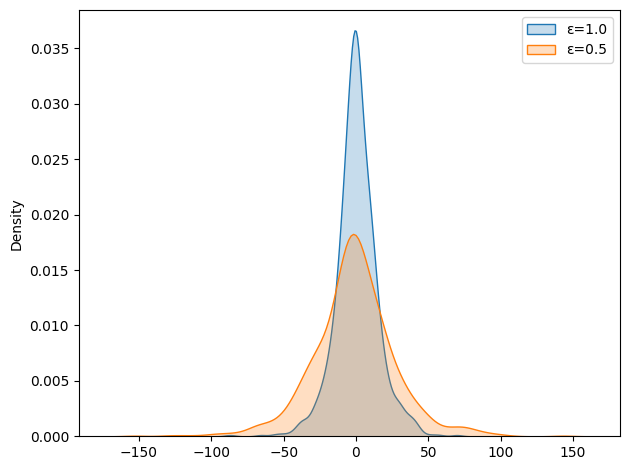

In [25]:
fig, ax = plt.subplots()
sns.kdeplot(private_release,label = f"ε={epsilon}",ax=ax,fill=True)
sns.kdeplot(private_release_2,label = f"ε={epsilon_2}",ax=ax,fill=True)
ax.legend()
plt.tight_layout()
plt.show()